The objective of this analysis is to get some insights by comparing the spread of the virus with the trend of mobility

# Libraries import

In [27]:
import pandas as pd
import datetime
import numpy as np
import matplotlib
import re
import matplotlib.pyplot as plt
matplotlib.style.use(["ggplot"])

# Importation of the datasets

## Covid-19

The Covid19 dataset is provided by John Hopkins University. The dataset is updated every day

In [28]:
# url towards the Github repository
url_racine = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [29]:
# the date from which CSSE repository started to collect data
date_begin = datetime.date(2020,1,22)

# download of the data
date_end = datetime.date.today()

range_of_date = pd.date_range(date_begin,end=date_end).strftime("%m-%d-%Y").tolist()

In [30]:
range_of_date_iter = range_of_date
iterative = 0
records = pd.DataFrame()
except_dates = []
result = {}
while (len(except_dates)>1 and iterative < 5) or (iterative == 0):
    iterative += 1
    print(except_dates)
    except_dates = []
    for date_given in range_of_date_iter:
        try:
            temp = pd.read_csv(url_racine + date_given + ".csv")
            num = temp.shape[0]
            temp["date"] = np.repeat(date_given,num)
            temp["Date"] = [datetime.datetime.strptime(date_str,'%m-%d-%Y') for date_str in temp.date]
            #temp = temp.drop(columns=["date"])
            records = records.append(temp,sort=False)
        except:
            except_dates.append(date_given)
            pass
    range_of_date_iter = except_dates
    result["table"+str(iterative)]=records
    records = pd.DataFrame()
    
records = result["table1"]

[]


In [33]:
records[records.Country_Region=="US"].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,NaN,NaN,NaN,9654.0,63.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36061.0,New York City,New York,US,3/22/20 23:45,40.767273,-73.971526,0.0,"New York City, New York, US"
1,NaN,NaN,NaN,1900.0,4.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36059.0,Nassau,New York,US,3/22/20 23:45,40.740665,-73.589419,0.0,"Nassau, New York, US"
2,NaN,NaN,NaN,1873.0,0.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36119.0,Westchester,New York,US,3/22/20 23:45,41.162784,-73.757417,0.0,"Westchester, New York, US"
3,NaN,NaN,NaN,1034.0,9.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36103.0,Suffolk,New York,US,3/22/20 23:45,40.883201,-72.801217,0.0,"Suffolk, New York, US"
4,NaN,NaN,NaN,455.0,1.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36087.0,Rockland,New York,US,3/22/20 23:45,41.150279,-74.025605,0.0,"Rockland, New York, US"


In [34]:
records.dtypes

Province/State            object
Country/Region            object
Last Update               object
Confirmed                float64
Deaths                   float64
Recovered                float64
date                      object
Date              datetime64[ns]
Latitude                 float64
Longitude                float64
FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Last_Update               object
Lat                      float64
Long_                    float64
Active                   float64
Combined_Key              object
dtype: object

we can notice that there are variables with the same information. They are:
* **Province/State** and **Province\_State**
* **Country/Region** and **Country\_Region**
* **Lat** and **Latitude**
* **Long_** and **Longitude**

Let's combine them into one variable each

In [35]:
records["Prov"] = records["Province/State"].combine_first(records["Province_State"])
records["Country"] = records["Country/Region"].combine_first(records["Country_Region"])
records["Lati"] = records["Latitude"].combine_first(records["Lat"])
records["Longi"] = records["Longitude"].combine_first(records["Long_"])

Then drop the redundant variables and the unused ones.

In [36]:
records.drop(columns=["Province/State",
"date",
"Province_State",
"Country_Region",
"Country/Region",
"Last Update",
"Last_Update",
"Longitude",
"Long_",
"Latitude",
"Lat",
"FIPS",],inplace=True)

In [37]:
print("the shape of the data is: \n{}".format(records.shape))
records.sort_values(["Confirmed"],ascending=False).head()

the shape of the data is: 
(95588, 11)


,Confirmed,Deaths,Recovered,Date,Admin2,Active,Combined_Key,Prov,Country,Lati,Longi
3044,198674.0,20453.0,77357.0,2020-04-19,NaN,100864.0,Spain,NaN,Spain,40.463667,-3.74922
3025,191726.0,20043.0,74797.0,2020-04-18,NaN,96886.0,Spain,NaN,Spain,40.463667,-3.74922
3017,190839.0,20002.0,74797.0,2020-04-17,NaN,96040.0,Spain,NaN,Spain,40.463667,-3.74922
3013,184948.0,19315.0,74797.0,2020-04-16,NaN,90836.0,Spain,NaN,Spain,40.463667,-3.74922
2972,178972.0,23660.0,47055.0,2020-04-19,NaN,108257.0,Italy,NaN,Italy,41.871940,12.56738


In [38]:
records.dtypes

Confirmed              float64
Deaths                 float64
Recovered              float64
Date            datetime64[ns]
Admin2                  object
Active                 float64
Combined_Key            object
Prov                    object
Country                 object
Lati                   float64
Longi                  float64
dtype: object

### Numerical variables

In [39]:
records.describe()

,Confirmed,Deaths,Recovered,Active,Lati,Longi
count,95569.000000,95147.000000,95200.000000,87971.000000,91724.000000,91724.000000
mean,443.299344,25.157682,109.710410,248.568255,36.237053,-76.565016
std,5090.325232,470.386013,2033.619934,3320.793663,11.169868,48.028576
min,0.000000,0.000000,0.000000,-70337.000000,-51.796300,-170.132000
25%,1.000000,0.000000,0.000000,0.000000,33.590350,-96.012303
50%,6.000000,0.000000,0.000000,0.000000,37.832188,-87.117235
75%,37.000000,1.000000,0.000000,4.000000,41.639360,-79.961898
max,198674.000000,23660.000000,88000.000000,124249.000000,72.000000,178.065000


We exclude the observations with $Nan$ in the Confirmed variable

In [40]:
records = records[[not x for x in np.isnan(records.Confirmed)]]


there are some issues in **Confirmed** and **Deaths** variables. Some countries do not have confirmed cases with deaths... For now, we will keep those cases in the dataset.

In [186]:
records[(records.Confirmed==0)&(records.Deaths!=0)].head(5)

,Confirmed,Deaths,Recovered,Date,Admin2,Active,Combined_Key,Prov,Country,Lati,Longi,Country_1
3188,0.0,1.0,0.0,2020-03-22,NaN,0.0,"Diamond Princess, Canada",Diamond Princess,Canada,0.0,0.0,Canada
2858,0.0,1.0,0.0,2020-03-23,Unassigned,0.0,"Unassigned, Florida, US",Florida,US,0.0,0.0,US
2875,0.0,3.0,0.0,2020-03-23,Unassigned,0.0,"Unassigned, Vermont, US",Vermont,US,0.0,0.0,US
3182,0.0,1.0,0.0,2020-03-23,NaN,0.0,"Diamond Princess, Canada",Diamond Princess,Canada,0.0,0.0,Canada
2856,0.0,2.0,0.0,2020-03-24,Unassigned,0.0,"Unassigned, Arizona, US",Arizona,US,0.0,0.0,US


### Categorical variables

In [27]:
records.describe(include="object")

,Combined_Key,Prov,Country
count,84899,84325,92516
unique,3566,298,235
top,"Rock, Wisconsin, US",Texas,US
freq,28,5509,79299


Some countries are recorded with different label. As it is shown below, it is the case of:
* South Korea
* Hong Kong SAR
* China

In [68]:
def detect_rep(pattern,list_countries):
    list_countries = [x for x in list_countries if not pd.isnull(x)]
    resu = [re.findall(pattern,x,flags = re.IGNORECASE) for x in list_countries]
    vect = []
    for test1,init in zip(resu,list_countries):
        if test1!=[]:
            vect.append(init)
    return set(vect)

dict_rep_name = {"korea":detect_rep("korea",records["Country"]),"hong kong":detect_rep("hong",records["Country"]),"china":detect_rep("china",records["Country"])}
dict_rep_name

{'korea': {'Korea, South', 'Republic of Korea', 'South Korea'},
 'hong kong': {'Hong Kong', 'Hong Kong SAR'},
 'china': {'China', 'Mainland China'}}

In [45]:
# some countries are recorded with different label
records = records.assign(Country_1 = lambda df : df["Country"].map(lambda country :
  "China" if bool(re.search("china",country,flags=re.IGNORECASE)) 
else ("Hong Kong" if bool(re.search("hong",country,flags=re.IGNORECASE)) 
else ("South Korea" if bool(re.search("korea",country,flags=re.IGNORECASE)) 
else country))))

In [46]:
print("the information on the data span from {} to {}".format(records.Date.min(),records.Date.max()))

the information on the data span from 2020-01-22 00:00:00 to 2020-04-19 00:00:00


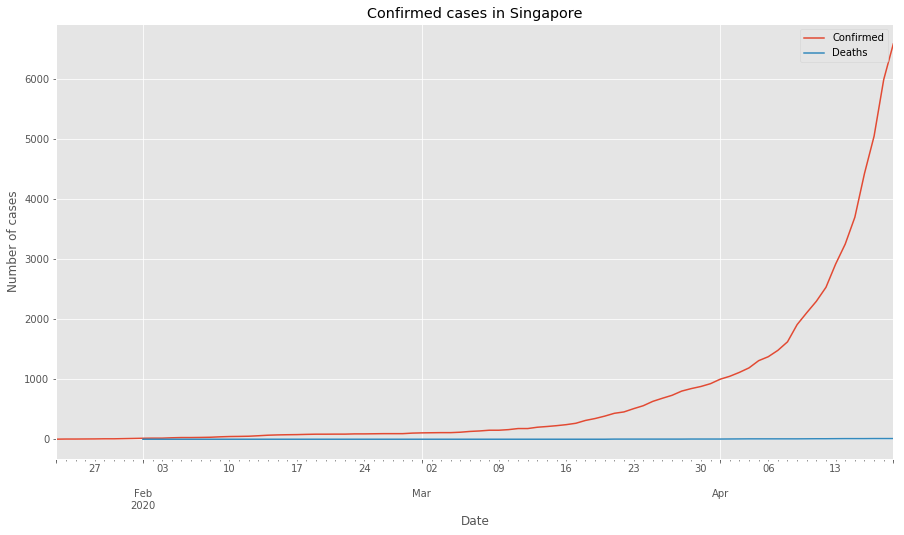

In [75]:
ax = records[records.Country_1=="Singapore"].plot(kind="line",x="Date",y=["Confirmed","Deaths"],figsize=(15,8))
ax.set_title("Confirmed cases in Singapore")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed cases")

## Mobility trends

In [274]:
url_racine_mob = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2006HotfixDev8/v1/en-us/applemobilitytrends-"
date_today = datetime.date.today()
iterative = 0
data_downloaded=0
while (iterative<10)&(data_downloaded==0):
    data_downloaded=1
    date=date_today- datetime.timedelta(days=iterative)
    date_str = date.strftime("%Y-%m-%d")
    try:
        data_mobility = pd.read_csv(url_racine_mob+date_str+".csv")
    except:
        data_downloaded=0
        pass
    iterative+=1

print("the mobility trend dataset is from the date: {}".format(date.strftime("%Y-%m-%d")))

the mobility trend dataset is from the date: 2020-04-17


In [257]:
data_mobility.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51


In [275]:
data_mobility_transpose = data_mobility.set_index(["geo_type","region","transportation_type"]).T

# Feature engineering

In [259]:
sumup_countries = records.groupby(["Country_1","Date"]).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

## Case Fatality Rate (CFR)

One indicator of the fatalities is the Case fatality rate (https://en.wikipedia.org/wiki/Case_fatality_rate)

In [260]:
sumup_countries = sumup_countries.assign(CFR = lambda df : df.Deaths/df.Confirmed).reset_index()

In [261]:
sumup_countries.head()

,Country_1,Date,Confirmed,Deaths,Recovered,CFR
0,Azerbaijan,2020-02-28,1.0,0.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0


## Number of days since 100th case

In [262]:
sumup_countries["interm"]=abs(sumup_countries.Confirmed-100)
control = sumup_countries.groupby(["Country_1"]).agg({"interm":"min"})

In [263]:
sumup_countries["check"]=False
for values in control.index.values:
    sumup_countries.loc[(sumup_countries.Country_1==values)&(sumup_countries.interm==control.loc[values].interm),"check"]=True

df=sumup_countries.loc[sumup_countries.check==True,["Date","Country_1"]]
sumup_countries = sumup_countries.merge(df,how="left",on="Country_1").assign(since_100th = lambda df : df["Date_x"] - df["Date_y"]).drop(columns=["interm","check","Date_y"])

In [264]:
sumup_countries["since_100th"]=sumup_countries.since_100th.dt.days

## First Viz

Text(0.5, 1.0, 'mobility trend in France')

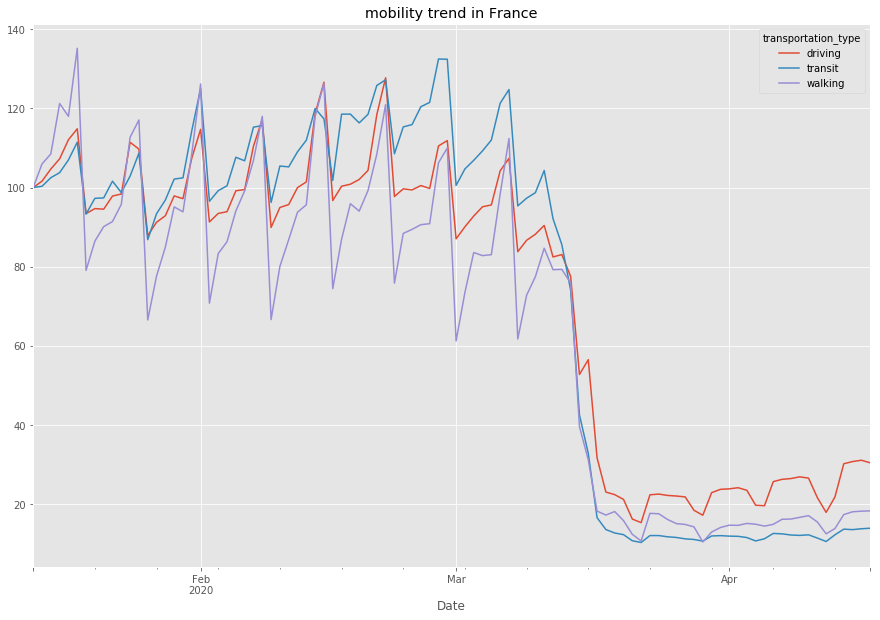

In [277]:
mob_France = data_mobility[data_mobility.region=="France"].drop(columns=["geo_type","region"]).set_index("transportation_type").T.reset_index().rename(columns={"index":"Date"})
mob_France["Date"] = [datetime.datetime.strptime(date_str,'%Y-%m-%d') for date_str in mob_France.Date]
ax = mob_France.plot(kind="line",x="Date",y=["driving","transit","walking"],figsize=(15,10))
ax.set_title("mobility trend in France")

Text(0, 0.5, 'Number of cases')

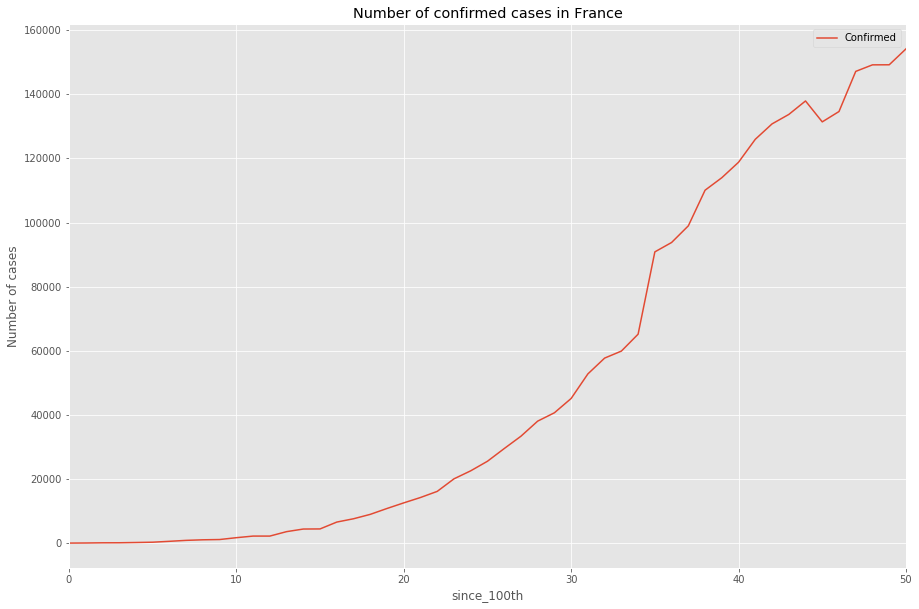

In [266]:
ax = sumup_countries[(sumup_countries.Country_1=="France")&(sumup_countries.since_100th.astype("int")>-1)].plot(kind="line",x="since_100th",y="Confirmed",figsize=(15,10))
ax.set_title("Number of confirmed cases in France")
ax.set_ylabel("Number of cases")

In [267]:
mob_France.head()

transportation_type,Date,driving,transit,walking
0,2020-01-13,100.00,100.00,100.00
1,2020-01-14,101.60,100.31,105.95
2,2020-01-15,104.67,102.48,108.49
3,2020-01-16,107.25,103.75,121.22
4,2020-01-17,112.07,106.97,117.98


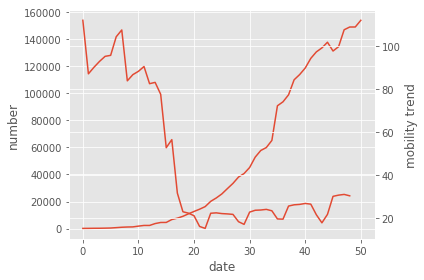

In [308]:
graph_France = sumup_countries[(sumup_countries.Country_1=="France")&(sumup_countries.since_100th.astype("int")>-1)].merge(mob_France,right_on="Date",left_on="Date_x",how="left")

fig, ax = plt.subplots()
ax
color = 'tab:red'
ax.set_xlabel('date')
ax.set_ylabel('number')
ax.plot(graph_France["since_100th"],graph_France["Confirmed"])

ax1=ax.twinx()

ax1.plot(graph_France["since_100th"],graph_France["driving"])
ax1.set_ylabel('mobility trend')
fig.tight_layout()

plt.show()


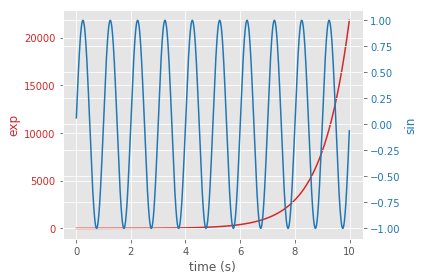

In [287]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [269]:
sumup_countries.Date_x.dtypes

dtype('<M8[ns]')

In [278]:
mob_France.Date.dtypes

dtype('<M8[ns]')